# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.046884e+01     6.596061e+00
 * time: 0.14482808113098145
     1     2.853457e+01     5.861249e+00
 * time: 0.1556689739227295
     2     2.438462e+01     7.851504e+00
 * time: 0.18308210372924805
     3     1.364241e+01     2.331775e+00
 * time: 0.21427607536315918
     4     1.208055e+01     1.846125e+00
 * time: 0.23366308212280273
     5     1.097063e+01     1.720673e+00
 * time: 0.2531290054321289
     6     9.719916e+00     1.534669e+00
 * time: 0.2725820541381836
     7     9.315791e+00     6.628821e-01
 * time: 0.2922639846801758
     8     9.058445e+00     5.882390e-01
 * time: 0.313413143157959
     9     8.930374e+00     4.794745e-01
 * time: 0.33284616470336914
    10     8.885742e+00     8.362675e-01
 * time: 0.34773898124694824
    11     8.843581e+00     6.190071e-01
 * time: 0.36234116554260254
    12     8.792275e+00     4.218734e-01
 * time: 0.37775301933288574
    13     8.739460e+00     3.165105e-01
 * time: 0.392

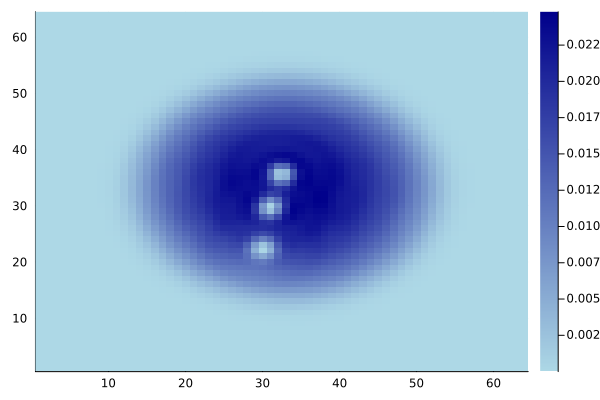

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)